In [1]:
from pdbfixer import PDBFixer
from openmm.app import PDBFile, PDBxFile, Modeller, ForceField
from openff.toolkit import Molecule, Topology
from rdkit import Chem

In [2]:
cif = '/eagle/projects/FoundEpidem/xlian/Agent/OpenffAgent/tmp/ptm/pred.model_idx_0.cif'
fixer = PDBFixer(filename=cif)

fixer.downloadTemplate('KPI')
fixer.findMissingResidues()
fixer.findMissingAtoms()
fixer.addMissingAtoms()
fixer.addMissingHydrogens(7.4)

modeller = Modeller(fixer.topology, fixer.positions)

#forcefield = ForceField("amber14-all.xml", "amber14/tip3pfb.xml")
#modeller.addHydrogens(forcefield, pH=7.4)

with open('/eagle/projects/FoundEpidem/xlian/Agent/OpenffAgent/tmp/ptm_H.pdb', "w") as f:
    PDBFile.writeFile(modeller.topology, modeller.positions, f, keepIds=True)

In [4]:
cif = '/eagle/projects/FoundEpidem/xlian/Agent/OpenffAgent/tmp/noptm/pred.model_idx_0.cif'
fixer = PDBFixer(filename=cif)

#fixer.downloadTemplate('KPI')
fixer.findMissingResidues()
fixer.findMissingAtoms()
fixer.addMissingAtoms()
#fixer.addMissingHydrogens(7.4)

modeller = Modeller(fixer.topology, fixer.positions)

forcefield = ForceField("amber14-all.xml", "amber14/tip3pfb.xml")
modeller.addHydrogens(forcefield, pH=7.4)

with open('/eagle/projects/FoundEpidem/xlian/Agent/OpenffAgent/tmp/noptm_H.pdb', "w") as f:
    PDBFile.writeFile(modeller.topology, modeller.positions, f, keepIds=True)

In [ ]:
with_h_path = '/eagle/projects/FoundEpidem/xlian/Agent/OpenffAgent/tmp/noptm_H.pdb'
#with_h_path = '/eagle/projects/FoundEpidem/xlian/Agent/OpenffAgent/tmp/noptm/noptm_reduceH.pdb' #reduce mess up histidine
topology = Topology.from_pdb(with_h_path)
molecule = topology.molecule(0)

UnassignedChemistryInPDBError: Some bonds or atoms in the input could not be identified.

Hint: The following residues were assigned names that do not match the residue name in the input, or could not be assigned residue names at all. This may indicate that atoms are missing from the input or some other error. The OpenFF Toolkit requires all atoms, including hydrogens, to be explicit in the input to avoid ambiguities in protonation state or bond order:
    Input residue A:HIS#0024 contains atoms matching substructures {'NO MATCH', 'PEPTIDE_BOND'}
    Input residue A:HIS#0072 contains atoms matching substructures {'NO MATCH', 'PEPTIDE_BOND'}
    Input residue A:HIS#0090 contains atoms matching substructures {'NO MATCH', 'PEPTIDE_BOND'}
    Input residue A:GLN#0205 contains atoms matching substructures {'NO MATCH', 'PEPTIDE_BOND', 'NH2'}

Error: The following 42 atoms exist in the input but could not be assigned chemical information from the substructure library:
    Atom   380 (CB) in residue A:HIS#0024
    Atom   381 (CG) in residue A:HIS#0024
    Atom   382 (ND1) in residue A:HIS#0024
    Atom   383 (CD2) in residue A:HIS#0024
    Atom   384 (CE1) in residue A:HIS#0024
    Atom   385 (NE2) in residue A:HIS#0024
    Atom   387 (HA) in residue A:HIS#0024
    Atom   388 (HB2) in residue A:HIS#0024
    Atom   389 (HB3) in residue A:HIS#0024
    Atom   390 (HD2) in residue A:HIS#0024
    Atom   391 (HE1) in residue A:HIS#0024
    Atom  1076 (CB) in residue A:HIS#0072
    Atom  1077 (CG) in residue A:HIS#0072
    Atom  1078 (ND1) in residue A:HIS#0072
    Atom  1079 (CD2) in residue A:HIS#0072
    Atom  1080 (CE1) in residue A:HIS#0072
    Atom  1081 (NE2) in residue A:HIS#0072
    Atom  1083 (HA) in residue A:HIS#0072
    Atom  1084 (HB2) in residue A:HIS#0072
    Atom  1085 (HB3) in residue A:HIS#0072
    Atom  1086 (HD2) in residue A:HIS#0072
    Atom  1087 (HE1) in residue A:HIS#0072
    Atom  1350 (CB) in residue A:HIS#0090
    Atom  1351 (CG) in residue A:HIS#0090
    Atom  1352 (ND1) in residue A:HIS#0090
    Atom  1353 (CD2) in residue A:HIS#0090
    Atom  1354 (CE1) in residue A:HIS#0090
    Atom  1355 (NE2) in residue A:HIS#0090
    Atom  1357 (HA) in residue A:HIS#0090
    Atom  1358 (HB2) in residue A:HIS#0090
    Atom  1359 (HB3) in residue A:HIS#0090
    Atom  1360 (HD2) in residue A:HIS#0090
    Atom  1361 (HE1) in residue A:HIS#0090
    Atom  3008 (C) in residue A:GLN#0205
    Atom  3009 (O) in residue A:GLN#0205
    Atom  3010 (CB) in residue A:GLN#0205
    Atom  3011 (CG) in residue A:GLN#0205
    Atom  3016 (HA) in residue A:GLN#0205
    Atom  3017 (HB2) in residue A:GLN#0205
    Atom  3018 (HB3) in residue A:GLN#0205
    Atom  3019 (HG2) in residue A:GLN#0205
    Atom  3020 (HG3) in residue A:GLN#0205


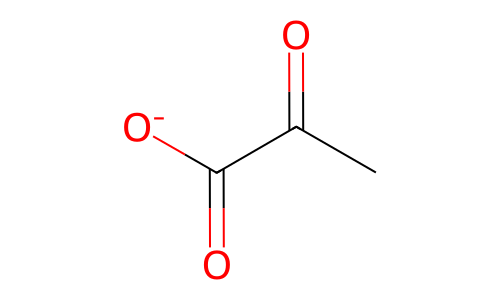

In [6]:
pyruvate_addition = 'CC(=O)C(=O)[O-]'
pyruvate_addition_numbered = '[O-:1][C:2](=[O:3])[C:4]=[C:5]'
pyruvate_mal = Molecule.from_smiles(pyruvate_addition)
pyruvate_mal.visualize(show_all_hydrogens=False)

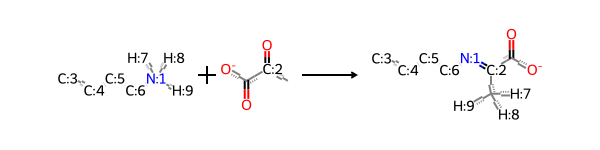

In [7]:
ptm_rxn = Chem.rdChemReactions.ReactionFromSmarts(
    '[C:3][C:4][C:5][C:6][N;+1:1]([H:7])([H:8])[H:9].C[C:2](=O)C(=O)[O-]' # 给赖氨酸侧链的碳也编上号
    '>>'
    '[C:3][C:4][C:5][C:6][N;+0:1]=[C:2](C([H:7])([H:8])[H:9])(C(=O)[O-])'
)
ptm_rxn # this will give 42 product... this is the best result... other SMARTS don't work
# KPI in CCD doesn't have H on the N, so 

In [8]:
amine = molecule.to_rdkit()
pyruvate = pyruvate_mal.to_rdkit()   # reagent

products = ptm_rxn.RunReactants([amine, pyruvate])
print("Number of products:", len(products))

Number of products: 42


18 126 [H]N(C)C(=O)[C@@]([H])(N([H])C(C)=O)C([H])([H])C([H])([H])C([H])([H])C([H])([H])N=C(C(=O)[O-])C([H])([H])[H]


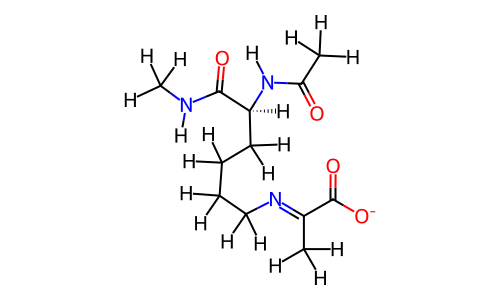

In [9]:
# find the right product among the messy results...
for index, rdmol in enumerate(products):
    rxn = Chem.rdChemReactions.ReactionFromSmarts(
        '[C](=[O])[N:3]([H:4])[C:5][C:6](=[O:7])[N]' 
        + ' >> ' 
        + '[CH3]C(=O)[N:3]([H:4])[C:5][C:6](=[O:7])N([H])[CH3]'
    )
    cut_product = rxn.RunReactants([rdmol[0]])
    found_aa = False

    for product in cut_product:
        capped_aa = product[0]
        for atom in capped_aa.GetAtoms():
            res = atom.GetPDBResidueInfo()
            if res is None:
                continue
            if res.GetResidueName() == 'LYS' and 'C(=O)[O-]' in Chem.MolToSmiles(capped_aa):
                capped_ncaa = capped_aa
                chain_id = res.GetChainId()
                residue_number = res.GetResidueNumber() # 1-indexed
                if residue_number == 126:
                    found_aa = True
                    print(index, residue_number, Chem.MolToSmiles(capped_aa))
                    KPI_dgoa = rdmol[0]
                    Chem.SanitizeMol(capped_ncaa)
                    break
    if found_aa:
        break
offmol = Molecule.from_rdkit(capped_ncaa, allow_undefined_stereo=True)
offmol.generate_conformers()

for cap_resname, smarts, resoffset in [
    ("ACE", "[C:1]([H:2])([H:3])([H:4])[C:5](=[O:6])N", -1),
    ("NME", "[C:1]([H:2])([H:3])([H:4])[N:5]([H:6])C", +1), 
]: 
    matches = offmol.chemical_environment_matches(smarts, unique=True)
    for match in matches:
        for idx in match:
            atom = offmol.atom(idx)
            if atom.metadata.get("residue_name") is None:
                atom.metadata["residue_name"] = cap_resname
                atom.metadata["residue_number"] = residue_number + resoffset
                atom.metadata["insertion_code"] = " "
                atom.metadata["chain_id"] = chain_id
ncaa_capped = offmol

offmol.add_default_hierarchy_schemes()
offmol.visualize()

In [10]:
Chem.SanitizeMol(KPI_dgoa)
labeled_smiles = Chem.MolToSmiles(KPI_dgoa)
smiles_path = '../tmp/noptm_H_add_KPI_smiles.txt'

with open(smiles_path, 'w') as f:
    f.write(labeled_smiles)

In [ ]:
protein_with_KPI = '/eagle/projects/FoundEpidem/xlian/Agent/OpenffAgent/tmp/ptm_H_KPIasATOM_rmHonKPI_fixLEU.pdb'
labeled = Molecule.from_pdb_and_smiles(protein_with_KPI, labeled_smiles, allow_undefined_stereo=True)

InvalidConformerError: The PDB and SMILES structures do not match.

In [13]:

# Make unnatural AA as its own mol. Since a residue is a substructure, not a valid molecule,
# use something that's easy to recognize as a "cap". Here I use Fr since it makes one bond and
# we're super unlikely to see Fr anywhere else.
substructure_mols = [
    Molecule.from_smiles(
        'C/C(=N\CCCC[C@@H](C(=O)[Fr])N[Fr])/C(=O)[O-]'
        #'[Fr]C(=O)[C@@]([H])(N([H])([Fr]))C([H])([H])C([H])([H])C([H])([H])C([H])([H])N([H])C(=C)C(=O)[O-]' #KPJ
        #"[Fr]N[C@@H](CCCCNC(=O)COCCOCCNC(=O)COCCOCCNC(=O)CC[C@@H](C(=O)O)NC(=O)CCCCCCCCCCCCCCCCC(=O)O)C(=O)[Fr]",
    )
]

# Label the atoms with whether they're leaving
for substructure in substructure_mols:
    for atom in substructure.atoms:
        if atom.symbol == "Fr":
            atom.metadata["substructure_atom"] = False
        else:
            atom.metadata["substructure_atom"] = True


<>:6: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\C'
/tmp/ipykernel_3098968/3638309212.py:6: SyntaxWarning: invalid escape sequence '\C'
  'C/C(=N\CCCC[C@@H](C(=O)[Fr])N[Fr])/C(=O)[O-]'


In [14]:
substructure_mols

[Molecule with name '' and SMILES '[H][N]([Fr])[C@]([H])([C](=[O])[Fr])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])/[N]=[C](/[C](=[O])[O-])[C]([H])([H])[H]']

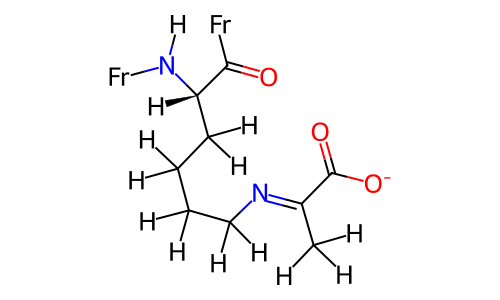

In [15]:
substructure_mols[0]

In [16]:
pdb_path = '/eagle/projects/FoundEpidem/xlian/Agent/OpenffAgent/tmp/ptm_H_KPIasATOM_rmHonKPI_fixLEU.pdb'

#from openff_agent.struct_fixer import 

top = Topology.from_pdb(
    pdb_path,
    # _additional_substructures is a PROTOTYPE.
    # Its behavior and input type are likely to change.
    _additional_substructures=substructure_mols, 
)

UnassignedChemistryInPDBError: Some bonds or atoms in the input could not be identified.

Hint: The following residue names with unassigned atoms were not found in the substructure library. While the OpenFF Toolkit identifies residues by matching chemical substructures rather than by residue name, it currently only supports the 20 'canonical' amino acids.
    KPI


Hint: The following residues were assigned names that do not match the residue name in the input, or could not be assigned residue names at all. This may indicate that atoms are missing from the input or some other error. The OpenFF Toolkit requires all atoms, including hydrogens, to be explicit in the input to avoid ambiguities in protonation state or bond order:
    Input residue A:KPI#0126 contains atoms matching substructures {'NO MATCH', 'NH2'}

Error: The following 25 atoms exist in the input but could not be assigned chemical information from the substructure library:
    Atom  1852 (CA) in residue A:KPI#0126
    Atom  1853 (HA) in residue A:KPI#0126
    Atom  1854 (CB) in residue A:KPI#0126
    Atom  1855 (HB) in residue A:KPI#0126
    Atom  1856 (HBA) in residue A:KPI#0126
    Atom  1857 (CG) in residue A:KPI#0126
    Atom  1858 (HG) in residue A:KPI#0126
    Atom  1859 (HGA) in residue A:KPI#0126
    Atom  1860 (CD) in residue A:KPI#0126
    Atom  1861 (HD) in residue A:KPI#0126
    Atom  1862 (HDA) in residue A:KPI#0126
    Atom  1863 (CE) in residue A:KPI#0126
    Atom  1864 (HE) in residue A:KPI#0126
    Atom  1865 (HEA) in residue A:KPI#0126
    Atom  1866 (NZ) in residue A:KPI#0126
    Atom  1867 (CX1) in residue A:KPI#0126
    Atom  1868 (C1) in residue A:KPI#0126
    Atom  1869 (H1C) in residue A:KPI#0126
    Atom  1870 (H1A) in residue A:KPI#0126
    Atom  1871 (H1B) in residue A:KPI#0126
    Atom  1872 (CX2) in residue A:KPI#0126
    Atom  1873 (O1) in residue A:KPI#0126
    Atom  1874 (O2) in residue A:KPI#0126
    Atom  1875 (C) in residue A:KPI#0126
    Atom  1876 (O) in residue A:KPI#0126
